In [1]:
# loading libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

Let's  have a look in the layoffs in the tech world in 2024 in comparison of the years before.

First step loading the data

In [2]:
data = pd.read_csv("/kaggle/input/tech-layoffs-2020-2024/tech_layoffs_til_Q4_2024.csv", delimiter=";")

# print(data.head)

print(data.columns)

Index(['Nr', 'Company', 'Location_HQ', 'Region', 'USState', 'Country',
       'Continent', 'Laid_Off', 'Date_layoffs', 'Percentage',
       'Company_Size_before_Layoffs', 'Company_Size_after_layoffs', 'Industry',
       'Stage', 'Money_Raised_in__mil', 'Year', 'latitude', 'longitude'],
      dtype='object')


In [3]:
summary = pd.DataFrame({
    'Non-NA Count': data.count(),
    'NA Count': data.isna().sum()
})
print(summary)


                             Non-NA Count  NA Count
Nr                                   2078         0
Company                              2078         0
Location_HQ                          2078         0
Region                                544      1534
USState                              1422       656
Country                              2078         0
Continent                            2078         0
Laid_Off                             1816       262
Date_layoffs                         2078         0
Percentage                           1810       268
Company_Size_before_Layoffs          1660       418
Company_Size_after_layoffs           1593       485
Industry                             2078         0
Stage                                2078         0
Money_Raised_in__mil                 1895       183
Year                                 2078         0
latitude                             2078         0
longitude                            2078         0


In [4]:
# Drop rows with NaN in 'Laid_Off' column
data_cleaned = data.dropna(subset=['Laid_Off'])

# Verify the cleaned data
print(data_cleaned.shape)  # Check rows and columns

# Count non-NA values in the cleaned data
non_na_counts = data_cleaned.count()
print(non_na_counts)


(1816, 18)
Nr                             1816
Company                        1816
Location_HQ                    1816
Region                          494
USState                        1227
Country                        1816
Continent                      1816
Laid_Off                       1816
Date_layoffs                   1816
Percentage                     1659
Company_Size_before_Layoffs    1660
Company_Size_after_layoffs     1593
Industry                       1816
Stage                          1816
Money_Raised_in__mil           1692
Year                           1816
latitude                       1816
longitude                      1816
dtype: int64


In [5]:
sum_laid_off = data_cleaned['Laid_Off'].sum()
print(sum_laid_off)

# Group by 'Year' and sum 'Laid_Off'
sum_laid_off_per_year = data_cleaned.groupby('Year')['Laid_Off'].sum()
print(sum_laid_off_per_year)

546364.0
Year
2020     61529.0
2021      6790.0
2022    127577.0
2023    176946.0
2024    173522.0
Name: Laid_Off, dtype: float64


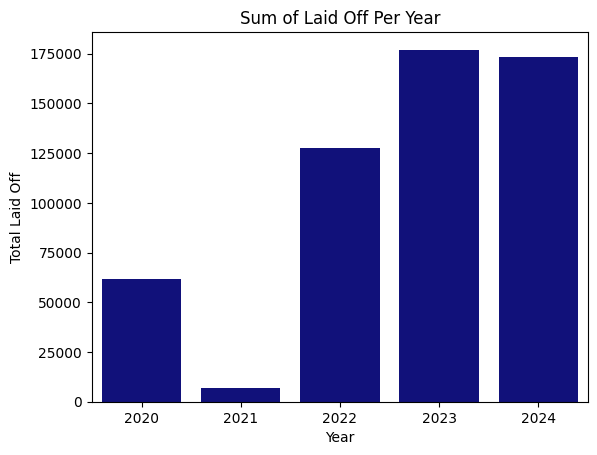

In [6]:
# Group by 'Year' and sum 'Laid_Off'
sum_laid_off_per_year = data_cleaned.groupby('Year')['Laid_Off'].sum()

# Create a bar chart using Seaborn
sns.barplot(x=sum_laid_off_per_year.index, y=sum_laid_off_per_year.values, color='darkblue')

# Add titles and labels
plt.title('Sum of Laid Off Per Year')
plt.xlabel('Year')
plt.ylabel('Total Laid Off')

# Show the plot
plt.show()

Layoffs in tech were in 2024 still high with 173.522, but not as high as in 2023.

In [7]:
# Group by 'Country' and sum 'Laid_Off'
sum_laid_off_per_continent = data_cleaned.groupby(['Continent'])['Laid_Off'].sum().reset_index()
sum_laid_off_per_continent = sum_laid_off_per_continent.sort_values(by='Laid_Off', ascending=False)

continents = sum_laid_off_per_continent.sort_values(by='Laid_Off', ascending=False)

print(continents)

# Group by 'Year' and 'Continent' and sum 'Laid_Off'
sum_laid_off_per_year_continent = data_cleaned.groupby(['Year', 'Continent'])['Laid_Off'].sum().reset_index()

# Sort by 'Year' (ascending) first, then by 'Laid_Off' (descending)
sum_laid_off_per_year_continent = sum_laid_off_per_year_continent.sort_values(by=['Year', 'Laid_Off'], ascending=[True, False])

# Get unique years in ascending order
years_continent = sorted(sum_laid_off_per_year_continent['Year'].unique())

# Loop through each year and print continents
for year in years_continent:
    year_data = sum_laid_off_per_year_continent[sum_laid_off_per_year_continent['Year'] == year]
    print(f"\nLayoffs per Continent for {year}:\n")
    print(year_data)


       Continent  Laid_Off
3  North America  402576.0
2         Europe   65168.0
1           Asia   63488.0
5  South America    8001.0
4         Oceana    3819.0
0         Africa    3312.0

Layoffs per Continent for 2020:

   Year      Continent  Laid_Off
2  2020  North America   45289.0
0  2020           Asia   12678.0
1  2020         Europe    2239.0
4  2020  South America    1227.0
3  2020         Oceana      96.0

Layoffs per Continent for 2021:

   Year      Continent  Laid_Off
7  2021  North America    6182.0
6  2021         Europe     387.0
5  2021           Asia     221.0

Layoffs per Continent for 2022:

    Year      Continent  Laid_Off
11  2022  North America   95534.0
9   2022           Asia   16396.0
10  2022         Europe    8836.0
13  2022  South America    4317.0
8   2022         Africa    1619.0
12  2022         Oceana     875.0

Layoffs per Continent for 2023:

    Year      Continent  Laid_Off
17  2023  North America  131004.0
16  2023         Europe   31109.0
15  2

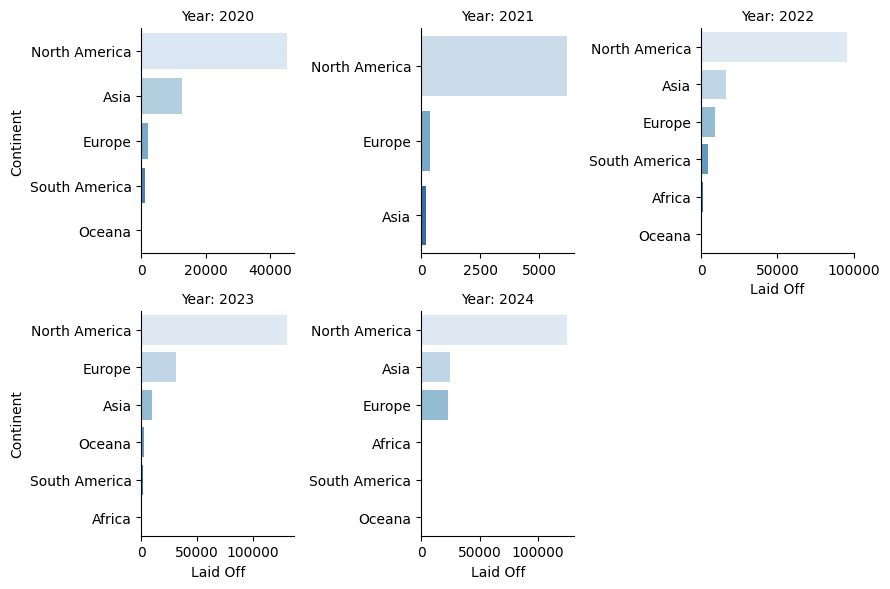

In [8]:
# Sort by Year and Laid_Off
sum_laid_off_per_year_continent = sum_laid_off_per_year_continent.sort_values(by=['Year', 'Laid_Off'], ascending=[True, False])

# Get top 10 companies per year
continent_year = sum_laid_off_per_year_continent.groupby('Year').head(10)

# Set up a FacetGrid with small multiple bar charts
g = sns.FacetGrid(continent_year, col="Year", col_wrap=3, sharex=False, sharey=False, height=3)  # 3 charts per row

# Create bar plots
g.map_dataframe(sns.barplot, x="Laid_Off", y="Continent", palette="Blues")

# Adjust layout and titles
g.set_titles(col_template="Year: {col_name}")
g.set_axis_labels("Laid Off", "Continent")
plt.tight_layout()
plt.show()


In [9]:
# Group by 'Year' and 'Country' and sum 'Laid_Off'
sum_laid_off_per_year_country = data_cleaned.groupby(['Year', 'Country'])['Laid_Off'].sum().reset_index()

print(sum_laid_off_per_year_country)

     Year    Country  Laid_Off
0    2020  Australia      96.0
1    2020     Brazil    1227.0
2    2020     Canada     982.0
3    2020    Estonia      63.0
4    2020    Germany     331.0
..    ...        ...       ...
100  2024      Spain      54.0
101  2024     Sweden    1990.0
102  2024         UK    5639.0
103  2024        USA  120529.0
104  2024    Uruquay     104.0

[105 rows x 3 columns]


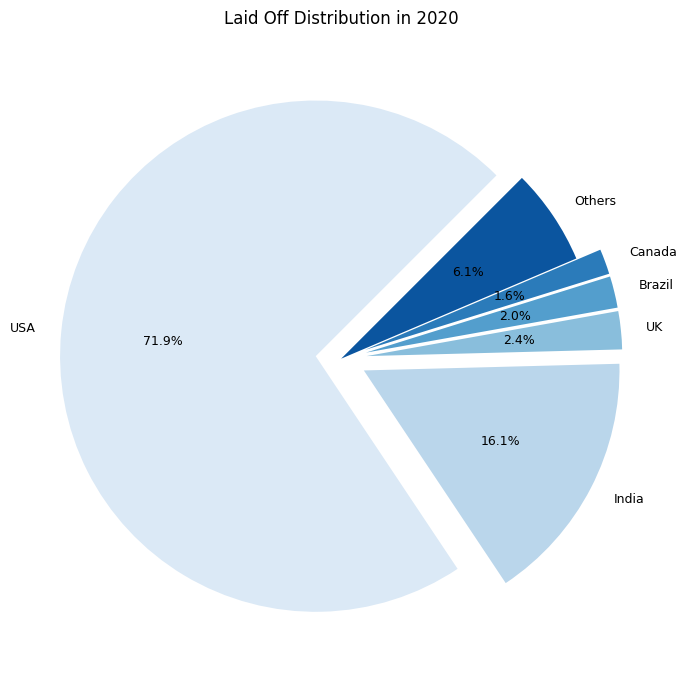

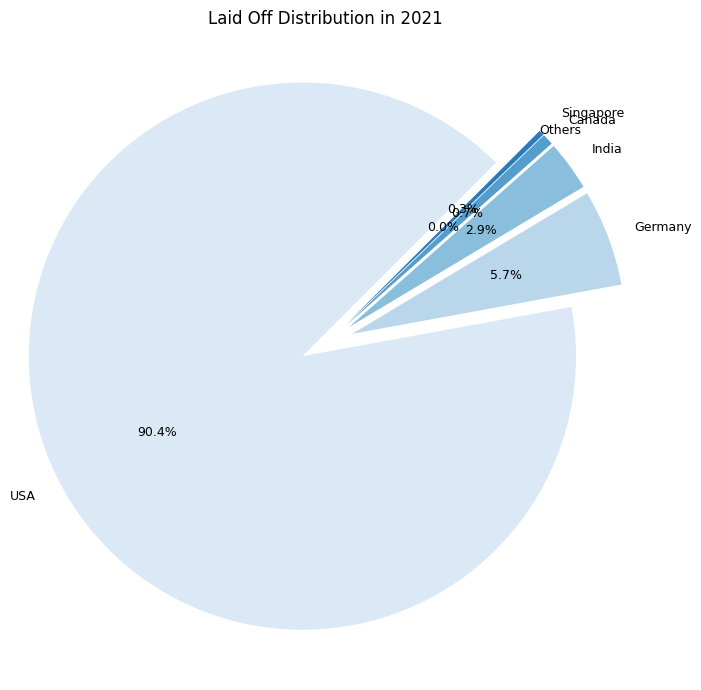

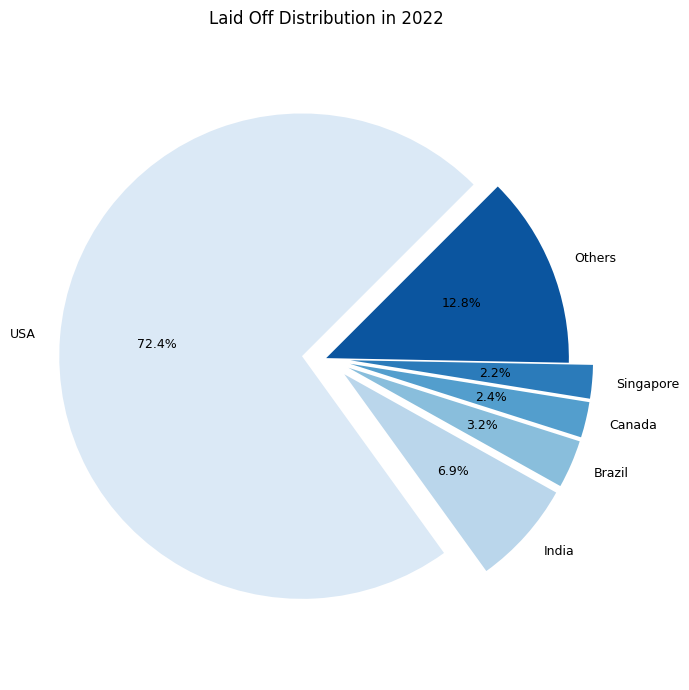

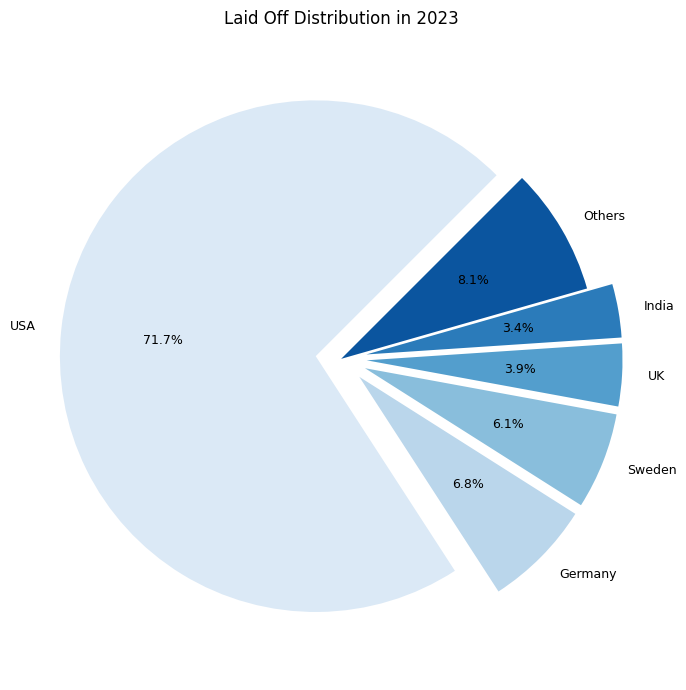

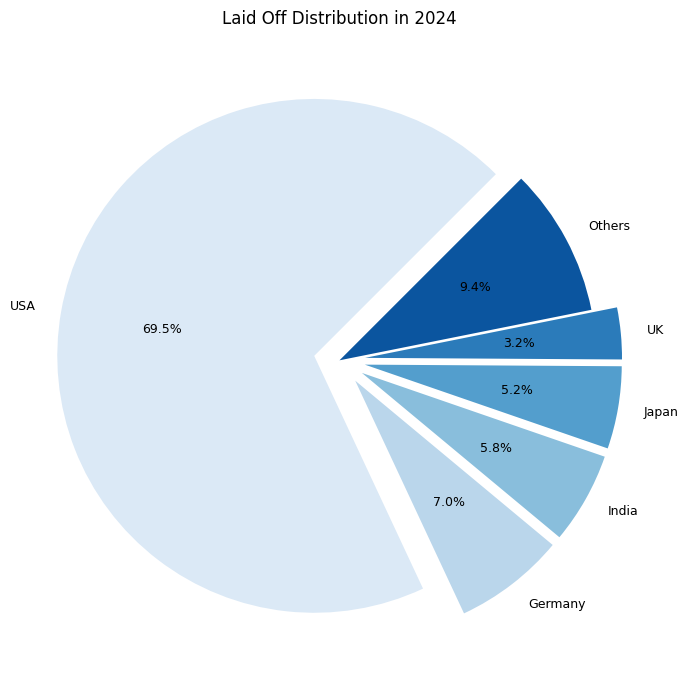

In [10]:
# Group by 'Year' and 'Country' and sum 'Laid_Off'
sum_laid_off_per_year_country = data_cleaned.groupby(['Year', 'Country'])['Laid_Off'].sum().reset_index()

# Get unique years
years = sum_laid_off_per_year_country['Year'].unique()

# Create a pie chart for each year
for year in years:
    # Filter data for the specific year
    year_data = sum_laid_off_per_year_country[sum_laid_off_per_year_country['Year'] == year]
    
    # Sort the data by 'Laid_Off' and get top 5 countries
    top_countries = year_data.nlargest(5, 'Laid_Off')
    
    # Get the remaining countries and sum their 'Laid_Off' values into "Others"
    others_sum = year_data[~year_data['Country'].isin(top_countries['Country'])]['Laid_Off'].sum()
    others = pd.DataFrame({'Country': ['Others'], 'Laid_Off': [others_sum]})
    
    # Combine top countries with "Others"
    final_data = pd.concat([top_countries, others])
    
    # Use Seaborn 'Set1' color palette
    colors = sns.color_palette('Blues', len(final_data))
    
    # Define 'explode' to slightly separate the largest slices (e.g., the top 5 countries)
    explode = [0.1 if country != 'Others' else 0 for country in final_data['Country']]

    # Plot the pie chart
    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(final_data['Laid_Off'], labels=final_data['Country'], autopct='%1.1f%%', 
                                       startangle=45, colors=colors, explode=explode, labeldistance=1.1)

    # Adjust label font size
    for text in texts + autotexts:
        text.set_fontsize(9)

    plt.title(f'Laid Off Distribution in {year}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    
    # Ensure the layout is adjusted so labels don't overlap
    plt.tight_layout()
    plt.show()

In [11]:
# data by company
sum_laid_off_per_company = data_cleaned.groupby(['Company'])['Laid_Off'].sum().reset_index()

# Sort by 'Laid_Off' in descending order
sum_laid_off_per_company = sum_laid_off_per_company.sort_values(by='Laid_Off', ascending=False)

top_10_companies = sum_laid_off_per_company.sort_values(by='Laid_Off', ascending=False).head(10)

print(top_10_companies)

sum_laid_off_per_year_company = data_cleaned.groupby(['Year', 'Company'])['Laid_Off'].sum().reset_index()

# Sort by 'Year' (ascending) and 'Laid_Off' (descending)
sum_laid_off_per_year_company = sum_laid_off_per_year_company.sort_values(by=['Year', 'Laid_Off'], ascending=[True, False])

# Get unique years
years = sum_laid_off_per_year_company['Year'].unique()

# Loop through each year and print the top 10 companies
for year in years:
    top_10 = sum_laid_off_per_year_company[sum_laid_off_per_year_company['Year'] == year].head(10)
    print(f"\nTop 10 Companies for {year}:\n")
    print(top_10)

                             Company  Laid_Off
48                            Amazon   27580.0
737                             Meta   21050.0
1138                           Tesla   20520.0
742                        Microsoft   16550.0
593                            Intel   15395.0
243                            Cisco   13950.0
496                           Google   13557.0
986                              SAP   11000.0
995   SaleSan Francisco Bay Areaorce   10000.0
1176                         Toshiba    9000.0

Top 10 Companies for 2020:

     Year                         Company  Laid_Off
289  2020                            Uber    7525.0
109  2020                         Groupon    2800.0
259  2020                          Swiggy    2250.0
2    2020                          Airbnb    1900.0
201  2020                     PaisaBazaar    1500.0
189  2020                             Ola    1400.0
255  2020                      Stitch Fix    1400.0
274  2020                           To

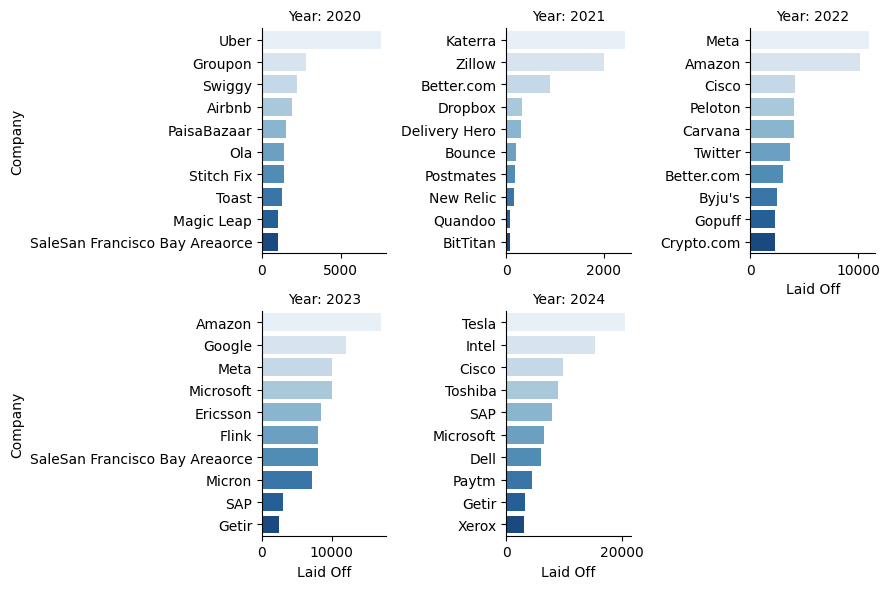

In [12]:
# Sort by Year and Laid_Off
sum_laid_off_per_year_company = sum_laid_off_per_year_company.sort_values(by=['Year', 'Laid_Off'], ascending=[True, False])

# Get top 10 companies per year
top_10_per_year = sum_laid_off_per_year_company.groupby('Year').head(10)

# Set up a FacetGrid with small multiple bar charts
g = sns.FacetGrid(top_10_per_year, col="Year", col_wrap=3, sharex=False, sharey=False, height=3)  # 3 charts per row

# Create bar plots
g.map_dataframe(sns.barplot, x="Laid_Off", y="Company", palette="Blues")

# Adjust layout and titles
g.set_titles(col_template="Year: {col_name}")
g.set_axis_labels("Laid Off", "Company")
plt.tight_layout()
plt.show()


# To do

Location_HQ - (with subset Region and subset USState

Percentage                     

Industry                       
Stage                          

maps (latitude and longitude) 